In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats

In [2]:
data = pd.read_csv('data/processed.csv')
data['yield'] = data['enr_num'] / data['adm_num']
data

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,yield
0,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,All,14.0,NaN,NaN,3.620000,NaN,NaN,NaN
1,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,8.0,NaN,NaN,3.620000,NaN,NaN,NaN
2,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,51520,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,5.0,NaN,NaN,3.620000,NaN,NaN,NaN
3,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
4,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,52910,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.121250,4.088571,0.875000
5,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,53075,San Jose,Santa Clara,California,USA,Santa Clara,All,14.0,NaN,NaN,3.640714,NaN,NaN,NaN
6,Berkeley,1994,ABRAHAM LINCOLN HIGH SCHOOL,53075,San Jose,Santa Clara,California,USA,Santa Clara,Hispanic/ Latino,6.0,NaN,NaN,3.640714,NaN,NaN,NaN
7,Berkeley,1994,ACADEMY OUR LADY OF PEACE,52820,San Diego,San Diego,California,USA,San Diego,All,5.0,NaN,NaN,3.786000,NaN,NaN,NaN
8,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,All,61.0,30.0,13.0,3.557869,3.828333,3.563846,0.433333
9,Berkeley,1994,ACALANES HIGH SCHOOL,51315,Lafayette,Contra Costa,California,USA,Contra Costa,Asian,16.0,4.0,NaN,3.557869,3.828333,NaN,NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


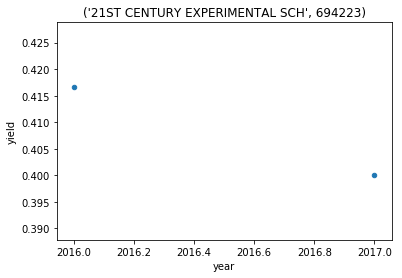

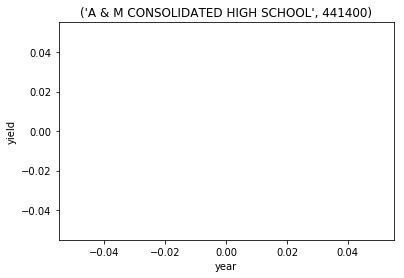

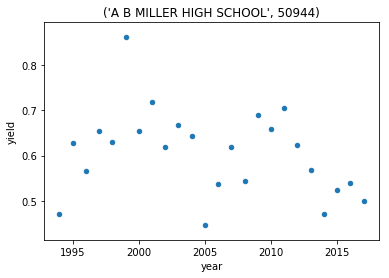

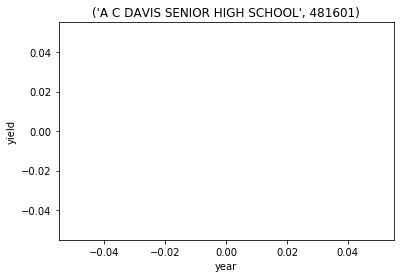

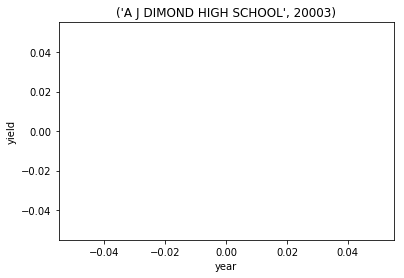

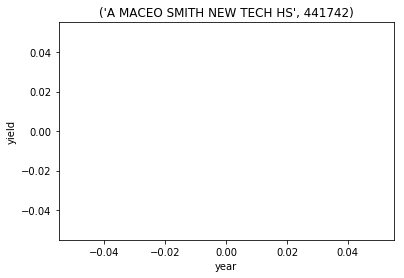

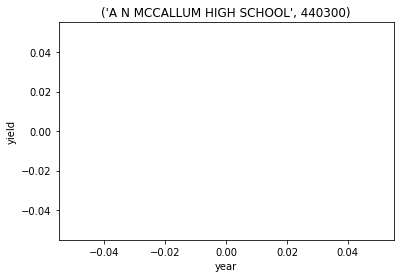

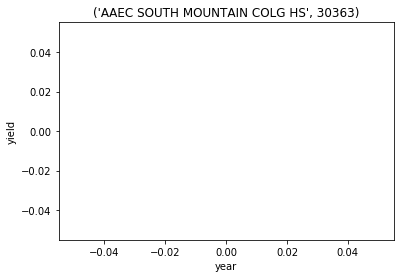

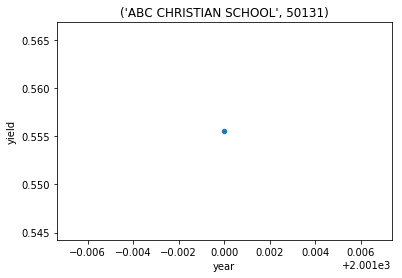

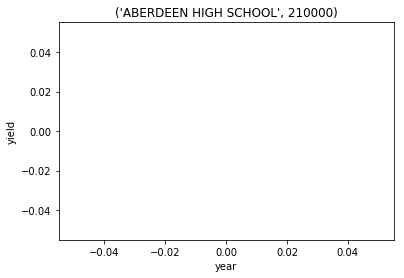

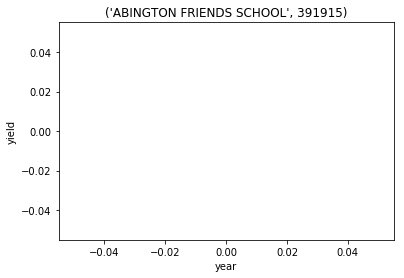

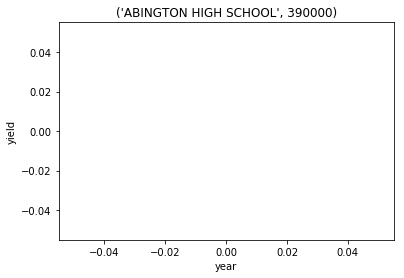

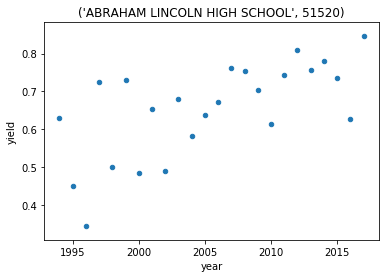

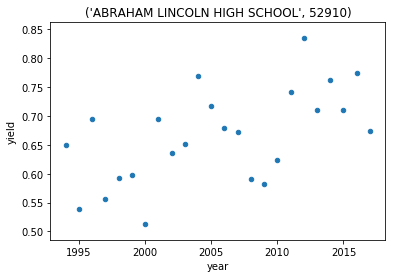

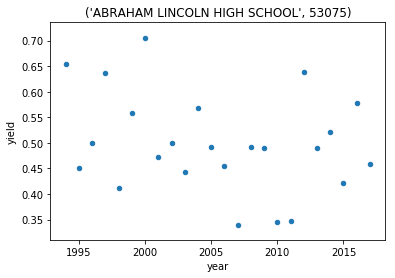

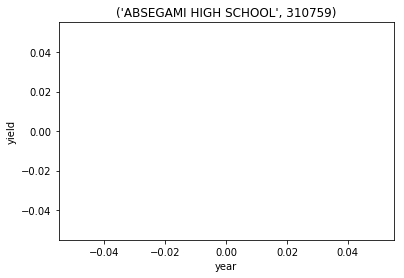

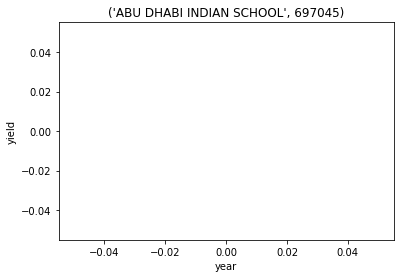

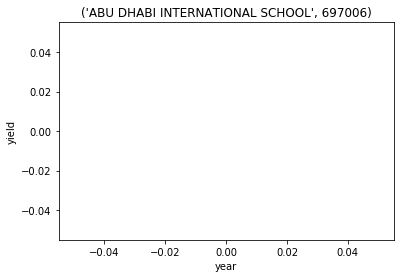

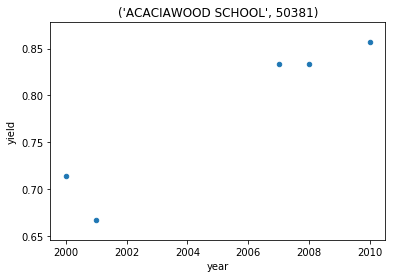

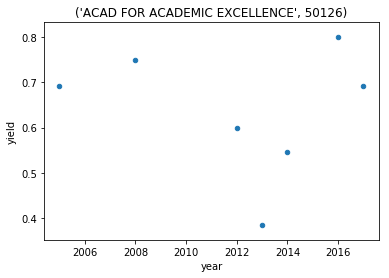

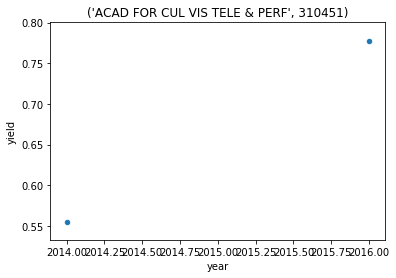

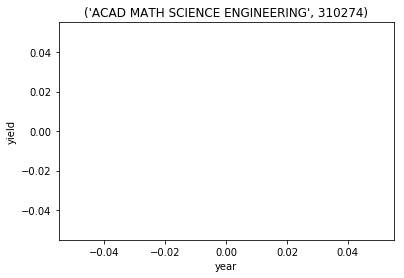

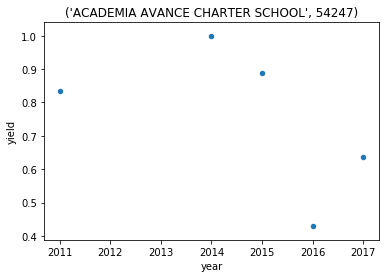

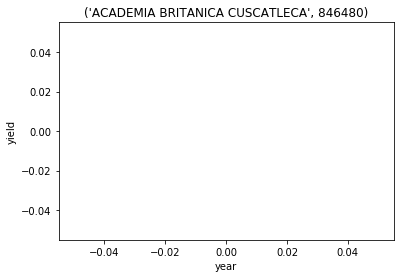

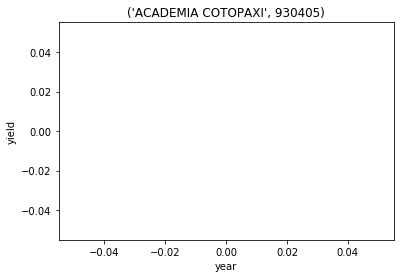

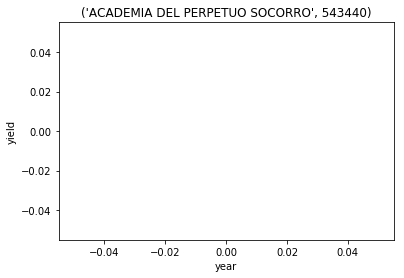

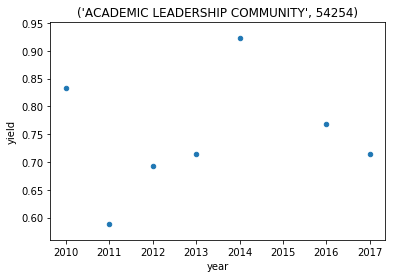

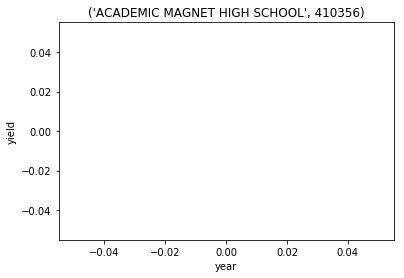

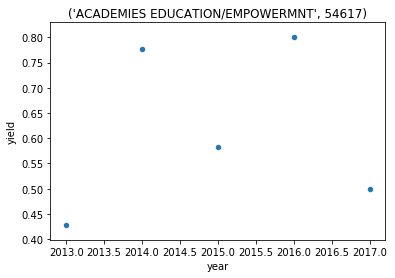

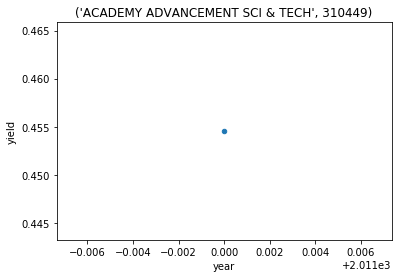

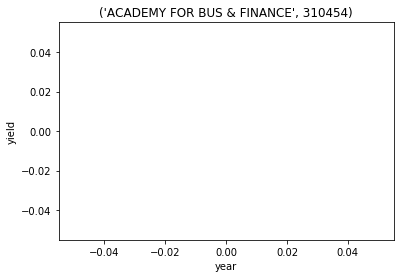

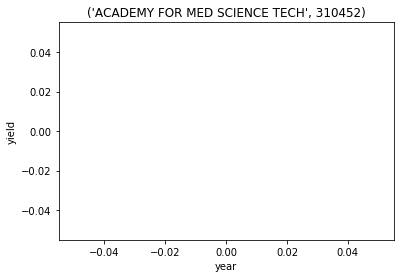

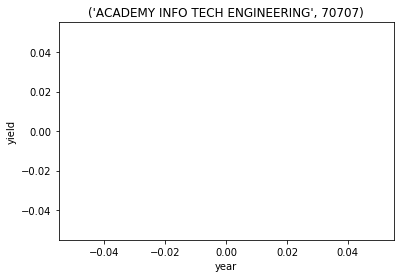

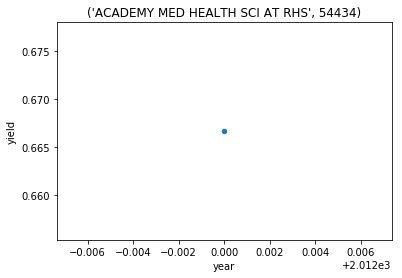

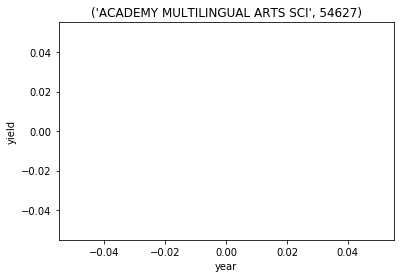

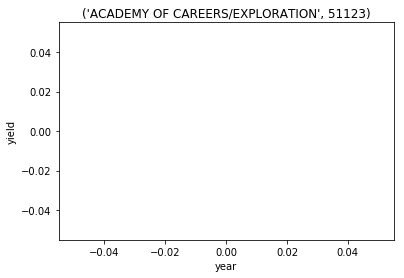

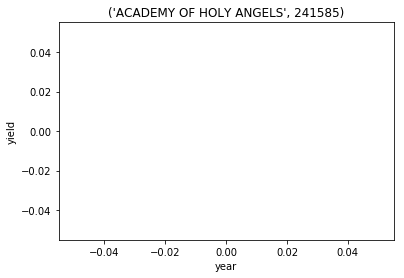

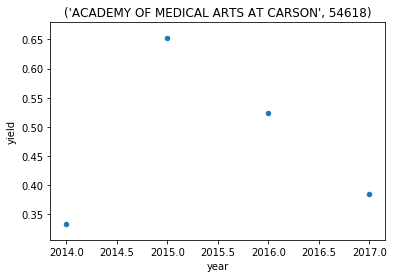

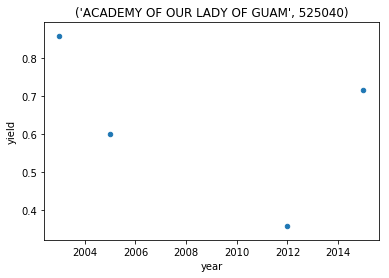

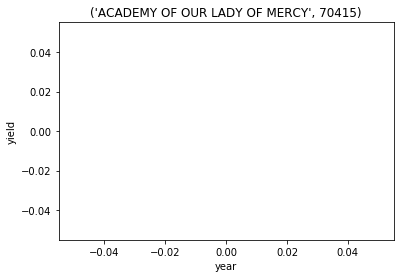

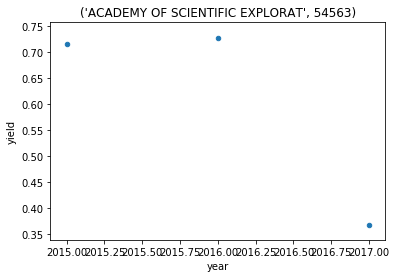

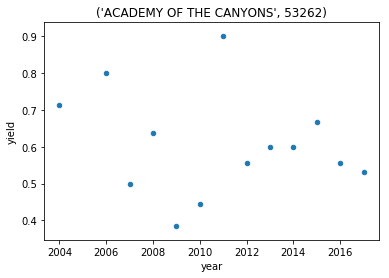

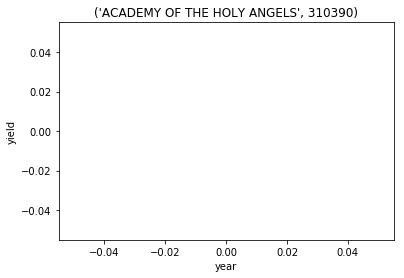

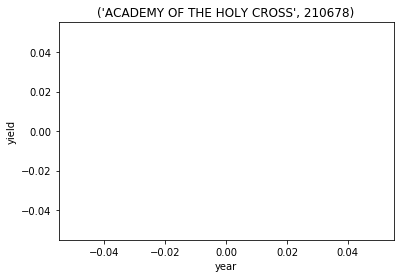

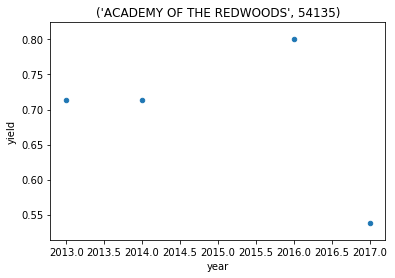

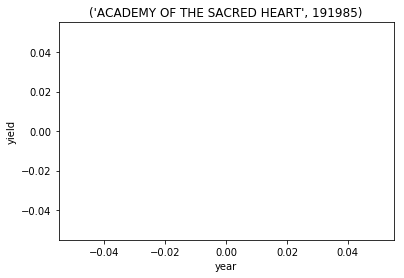

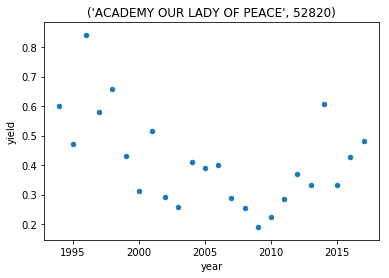

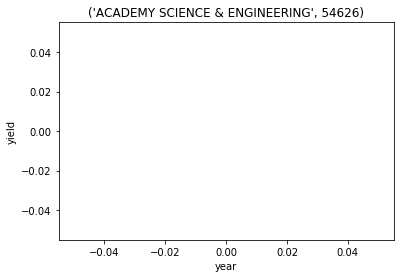

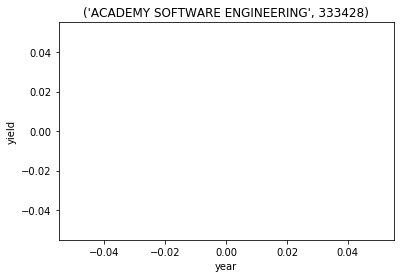

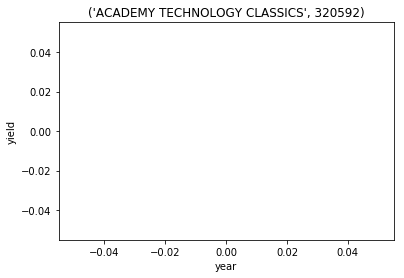

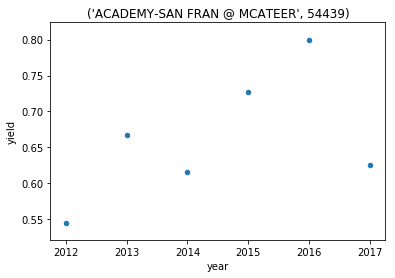

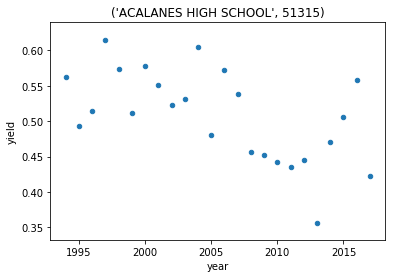

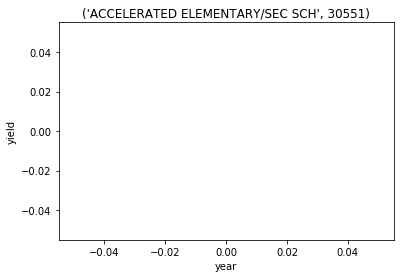

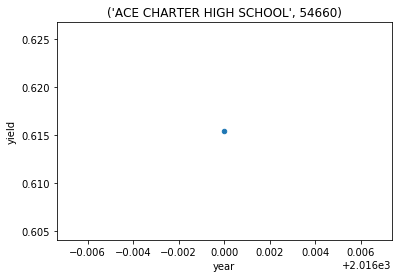

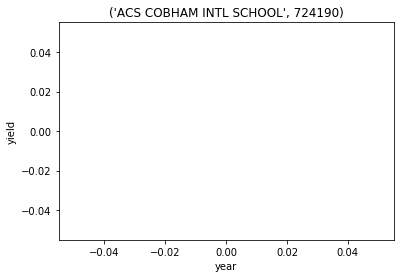

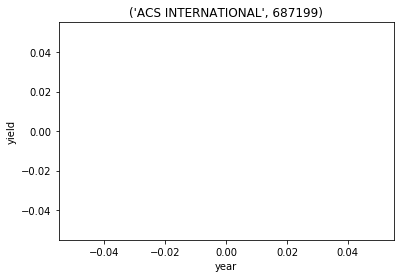

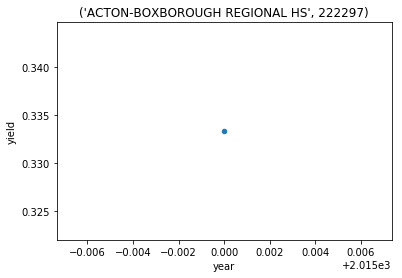

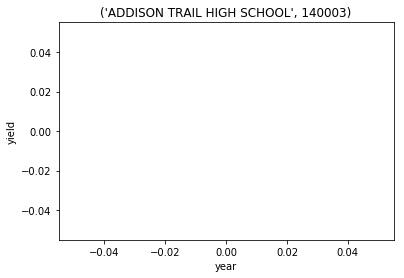

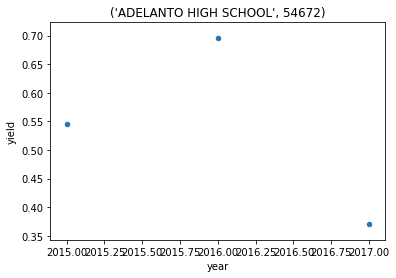

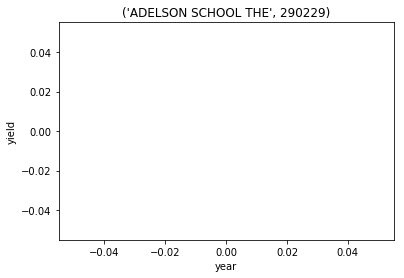

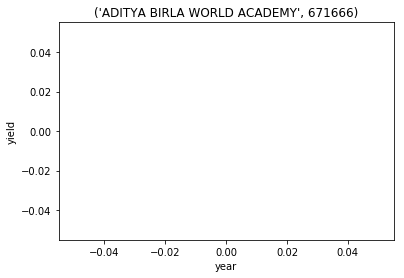

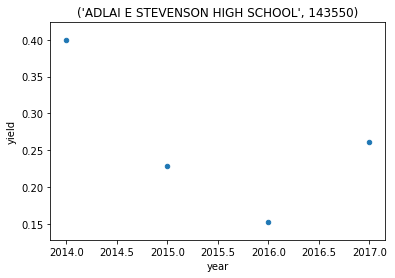

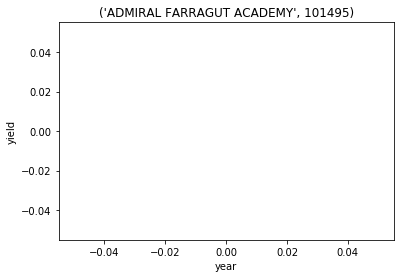

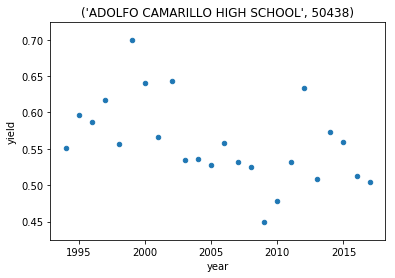

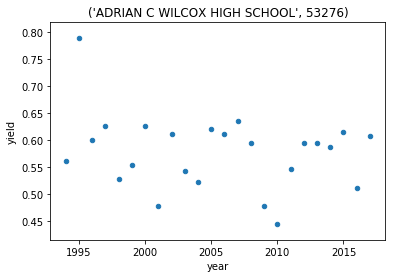

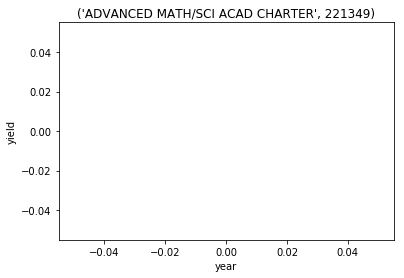

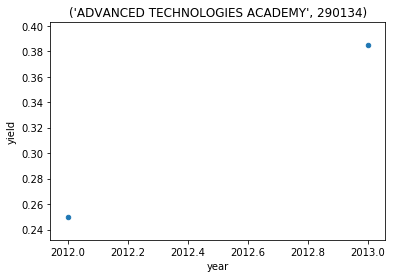

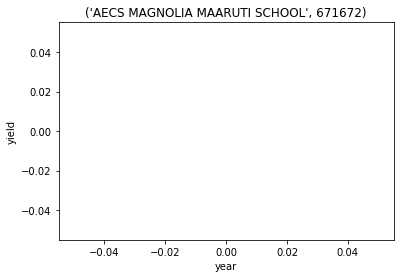

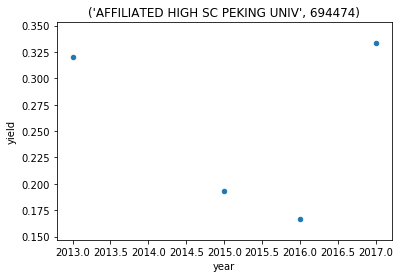

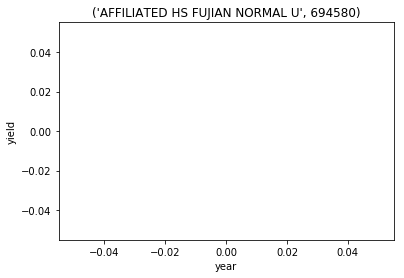

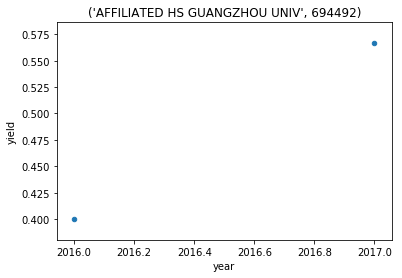

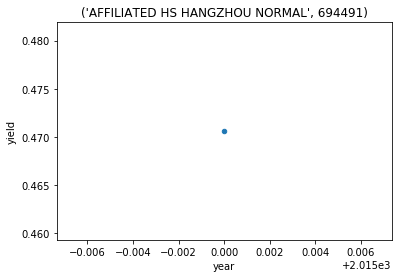

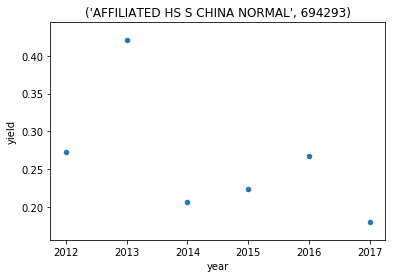

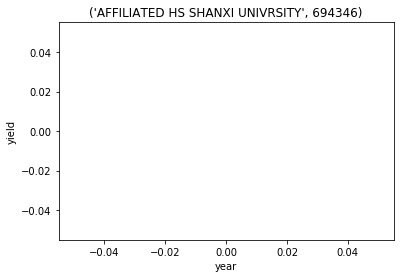

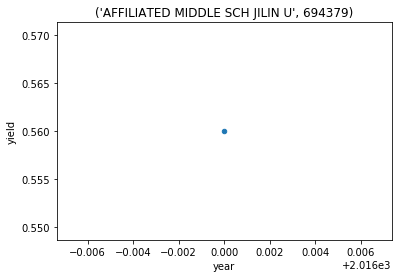

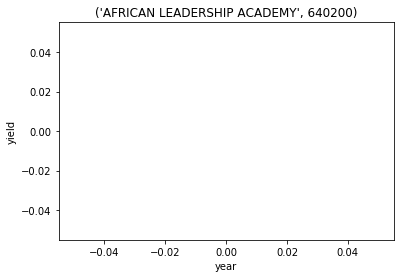

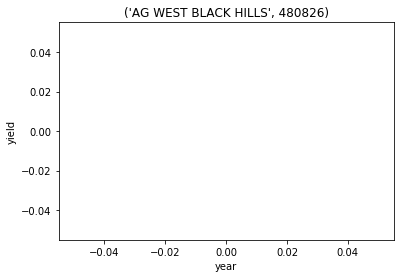

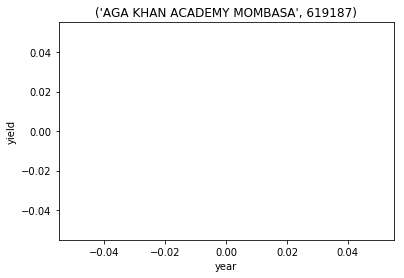

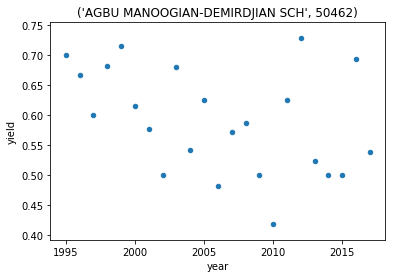

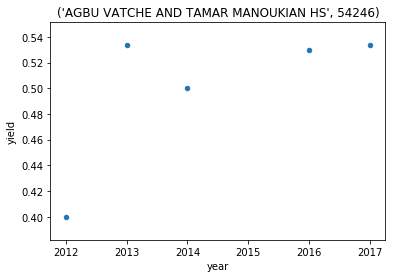

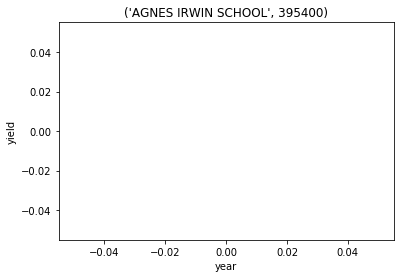

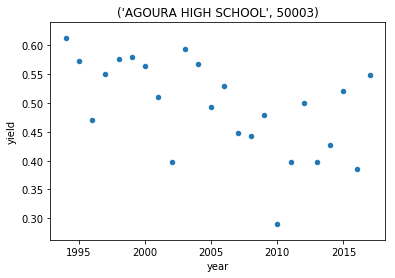

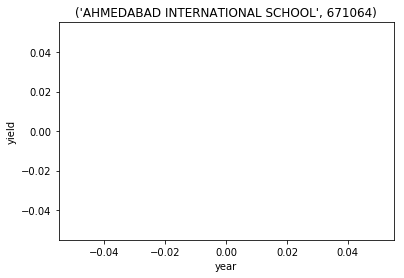

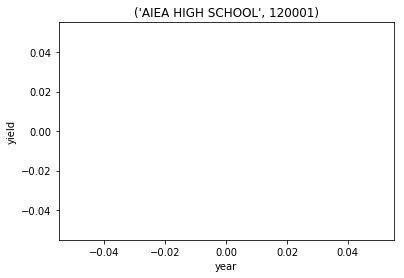

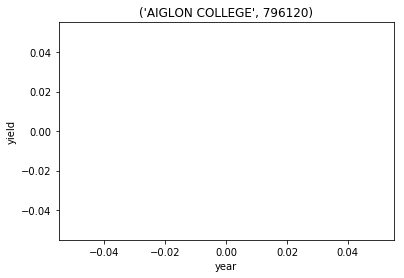

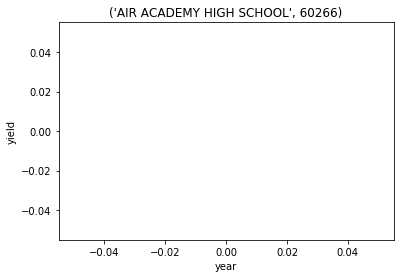

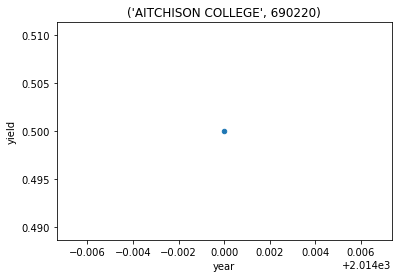

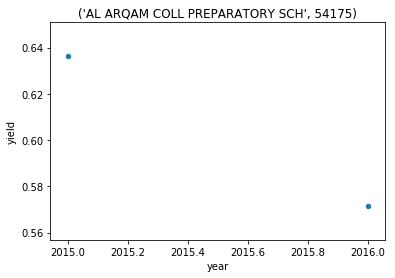

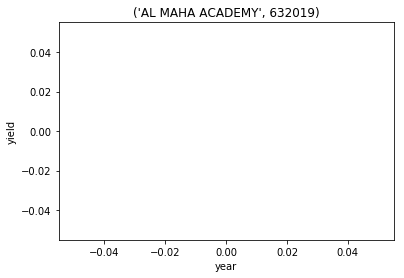

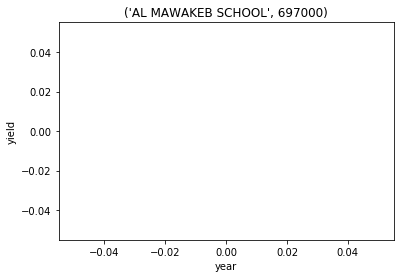

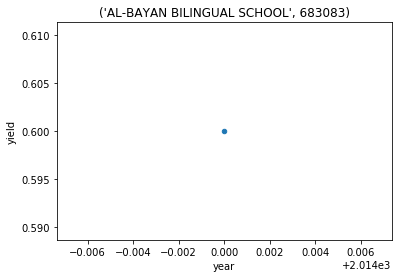

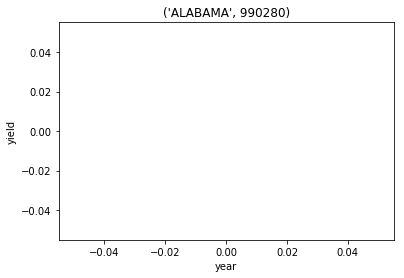

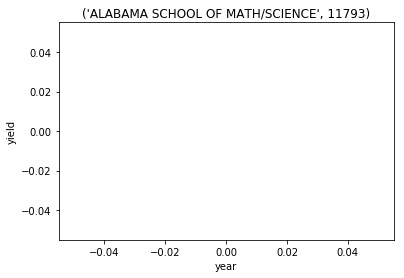

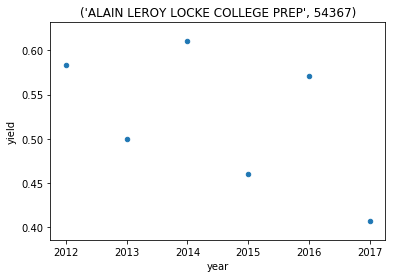

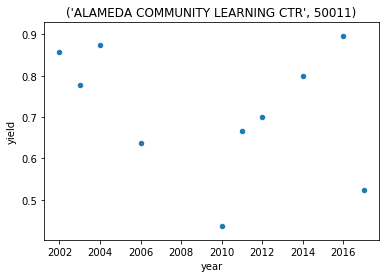

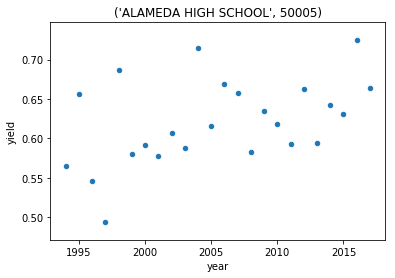

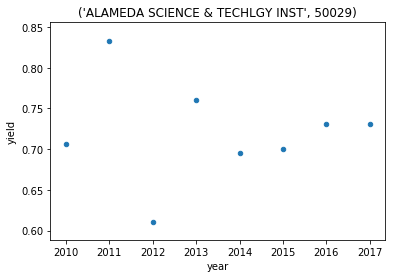

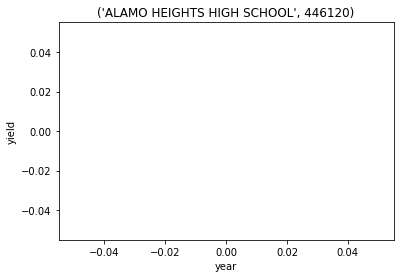

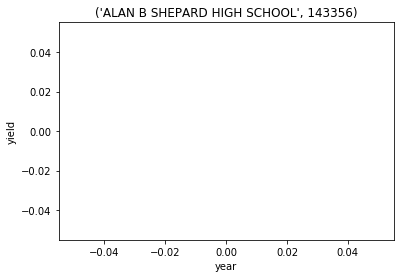

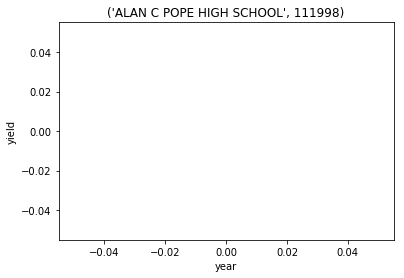

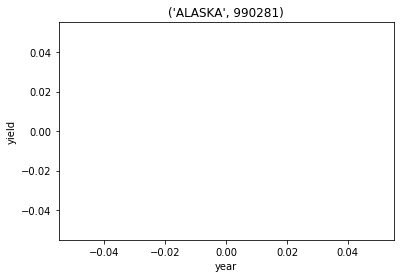

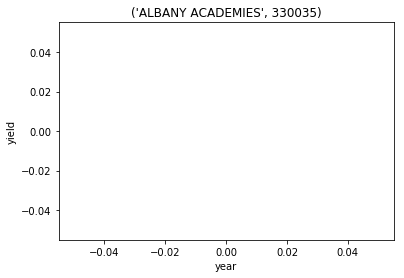

In [3]:
gb = data.loc[(data['ethnicity']=='All') & (data['campus']=='Universitywide')].groupby(["school", "school_num"])
# series = []
i = 0
# print(gb.get_group())
for name, group in gb:
    group.plot.scatter(x='year', y='yield')
    plt.title(name)
    if i > 100:
        break
    i += 1 

In [4]:
avg_yields = gb['yield'].agg(np.mean)
avg_yields

school                            school_num
21ST CENTURY EXPERIMENTAL SCH     694223        0.408333
A & M CONSOLIDATED HIGH SCHOOL    441400             NaN
A B MILLER HIGH SCHOOL            50944         0.605714
A C DAVIS SENIOR HIGH SCHOOL      481601             NaN
A J DIMOND HIGH SCHOOL            20003              NaN
A MACEO SMITH NEW TECH HS         441742             NaN
A N MCCALLUM HIGH SCHOOL          440300             NaN
AAEC SOUTH MOUNTAIN COLG HS       30363              NaN
ABC CHRISTIAN SCHOOL              50131         0.555556
ABERDEEN HIGH SCHOOL              210000             NaN
ABINGTON FRIENDS SCHOOL           391915             NaN
ABINGTON HIGH SCHOOL              390000             NaN
ABRAHAM LINCOLN HIGH SCHOOL       51520         0.654413
                                  52910         0.665233
                                  53075         0.498682
ABSEGAMI HIGH SCHOOL              310759             NaN
ABU DHABI INDIAN SCHOOL           697045   

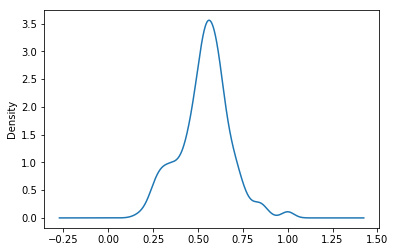

In [5]:
avg_yields.plot.density()

In [6]:
avg_yields.count()

1032

In [7]:
gb = data.loc[(data['ethnicity']=='All') & (data['campus']=='Universitywide')].groupby("year")
avg_yields = gb['yield'].agg(np.mean)
avg_yields

year
1994    0.595967
1995    0.588579
1996    0.580596
1997    0.589684
1998    0.585969
1999    0.580867
2000    0.583429
2001    0.562913
2002    0.565645
2003    0.540041
2004    0.573890
2005    0.545403
2006    0.545797
2007    0.523357
2008    0.505608
2009    0.479663
2010    0.480455
2011    0.534662
2012    0.531322
2013    0.531611
2014    0.548266
2015    0.534674
2016    0.530936
2017    0.512697
Name: yield, dtype: float64

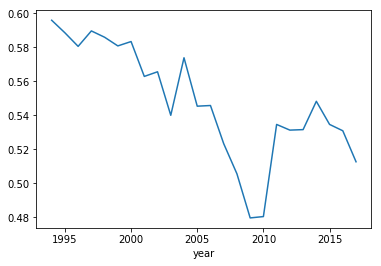

In [8]:
avg_yields.plot()